In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../data/cleaned_texts_oct19_2016.tsv', sep='\t')
records = records[records.pub_year > 1899]
records = records[records.pub_year < 2000]

In [3]:
len(records)

5637375

In [4]:
records.head(1)

,Unnamed: 0,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country
0,0,1000686,chao,NaN,"sauvajon, marc-gilbert",escelicer,madrid,1972,NaN,fre,"madrid,spain",madrid,spain


In [5]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

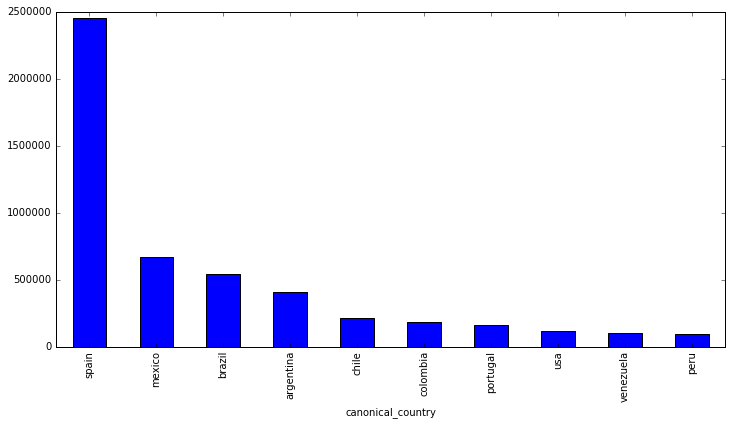

In [6]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")

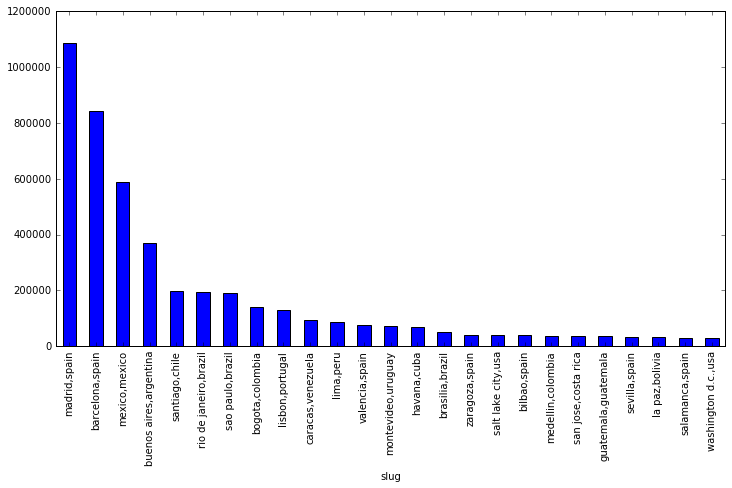

In [7]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")

## Global Publication By Year

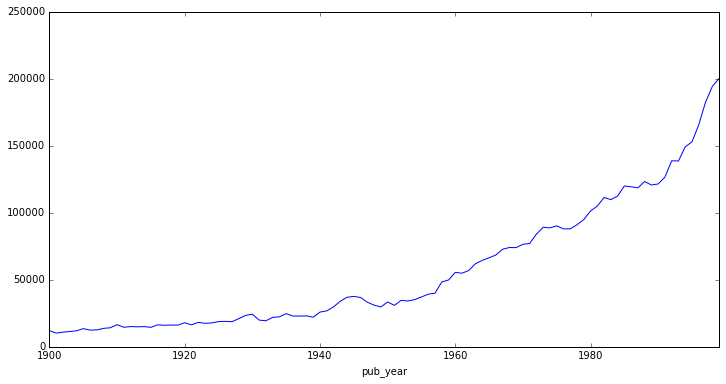

In [8]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [9]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index
top_slugs

Index(['madrid,spain', 'barcelona,spain', 'mexico,mexico',
       'buenos aires,argentina', 'santiago,chile', 'rio de janeiro,brazil',
       'sao paulo,brazil', 'bogota,colombia', 'lisbon,portugal',
       'caracas,venezuela'],
      dtype='object', name='slug')

In [10]:
top_producers = records[records.slug.isin(top_slugs)]

In [11]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [12]:
top_producer_df = pd.DataFrame({
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'mexico,mexico': group_top_producers.ix['mexico,mexico'],
    'buenos aires,argentina': group_top_producers.ix['buenos aires,argentina'],
    'santiago,chile': group_top_producers.ix['santiago,chile'],
    'rio de janeiro,brazil': group_top_producers.ix['rio de janeiro,brazil'],
    'sao paulo,brazil': group_top_producers.ix['sao paulo,brazil'],
    'bogota,colombia': group_top_producers.ix['bogota,colombia'],
    'lisbon,portugal': group_top_producers.ix['lisbon,portugal'],
    'caracas,venezuela': group_top_producers.ix['caracas,venezuela'],
})

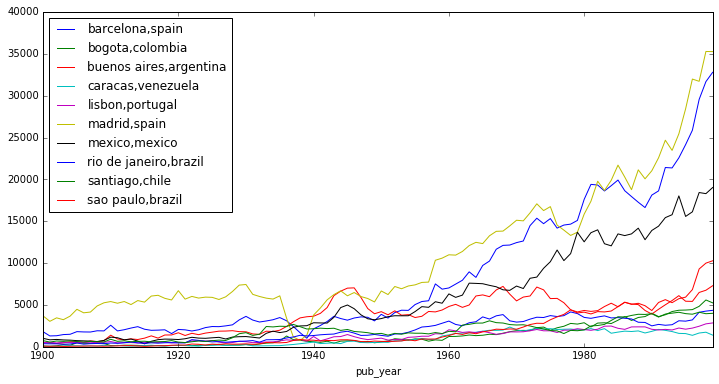

In [13]:
top_producer_df.plot()

## Same but with % of total

In [14]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']

In [15]:
top_producer_df_percent = pd.DataFrame({
    'madrid,spain': top_producer_df['madrid,spain'].divide(counted_by_year.values),
    'barcelona,spain': top_producer_df['barcelona,spain'].divide(counted_by_year.values),
    'mexico,mexico': top_producer_df['mexico,mexico'].divide(counted_by_year.values),
    'buenos aires,argentina': top_producer_df['buenos aires,argentina'].divide(counted_by_year.values),
    'santiago,chile': top_producer_df['santiago,chile'].divide(counted_by_year.values),
#     'rio de janeiro,brazil': top_producer_df['rio de janeiro,brazil'].divide(counted_by_year.values),
#     'sao paulo,brazil': top_producer_df['sao paulo,brazil'].divide(counted_by_year.values),
#     'bogota,colombia': top_producer_df['bogota,colombia'].divide(counted_by_year.values),
#     'lisbon,portugal': top_producer_df['lisbon,portugal'].divide(counted_by_year.values),
#     'caracas,venezuela': top_producer_df['caracas,venezuela'].divide(counted_by_year.values),
})

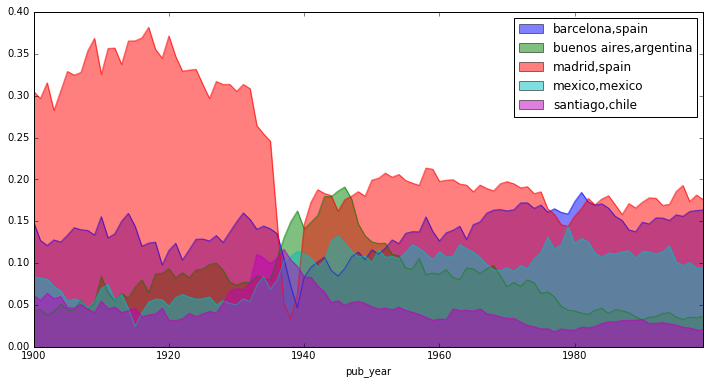

In [16]:
top_producer_df_percent.plot.area(stacked=False)